In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models import FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the soybean dataset
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_excel("data/soybean_102.xlsx")
# print(raw_df.head())
# X = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :2]])
X = raw_df.values[0::1, 1:]
y = raw_df.values[0::1, 0]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape, y.shape

((3060, 20), (3060,))

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2448, 20), (612, 20), (2448,), (612,))

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    comp_time = end_time - start_time

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mae, mse, train_time, comp_time


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ], final_estimator=Ridge()),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, fit_time, comp_time = train_evaluate_model(
        model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                     "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

In [5]:
# # Initialize and train MLP
# input_dim = X_train.shape[1]
# hidden_dim = 10  # Increased hidden layer size
# output_dim = 1
# num_trees_input = 0
# epochs = 20000  # Increased number of epochs
# learning_rate = 0.0001  # Decreased learning rate

# start_time = time.time()
# mlp = FONN1(input_dim, hidden_dim, output_dim, num_trees_input)
# mlp.train(X_train, y_train, epochs, learning_rate)
# end_time = time.time()
# mlp_train_time = end_time - start_time

In [6]:
# Initialize and train FONN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Increased hidden layer size
output_dim = 1
num_trees_input = 10
epochs = 40000  # Increased number of epochs
learning_rate = 0.0001  # Decreased learning rate

start_time = time.time()
fonn1 = FONN1(input_dim, hidden_dim, output_dim, num_trees_input)
fonn1.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
fonn1_train_time = end_time - start_time

Epoch 0, Loss: 25.716853383750692
Epoch 100, Loss: 25.698585272779482
Epoch 200, Loss: 25.680742539968943
Epoch 300, Loss: 25.6632249278955
Epoch 400, Loss: 25.645936003982808
Epoch 500, Loss: 25.628781152379407
Epoch 600, Loss: 25.611665831614417
Epoch 700, Loss: 25.59449411462577
Epoch 800, Loss: 25.577167528068745
Epoch 900, Loss: 25.559584206253113
Epoch 1000, Loss: 25.541638371282993
Epoch 1100, Loss: 25.52322014547511
Epoch 1200, Loss: 25.504215696188535
Epoch 1300, Loss: 25.48450770846313
Epoch 1400, Loss: 25.46397617866221
Epoch 1500, Loss: 25.442499522915984
Epoch 1600, Loss: 25.41995599634128
Epoch 1700, Loss: 25.396225420183594
Epoch 1800, Loss: 25.371191210999893
Epoch 1900, Loss: 25.344742696143012
Epoch 2000, Loss: 25.316777682147848
Epoch 2100, Loss: 25.287205218401567
Epoch 2200, Loss: 25.25594847093352
Epoch 2300, Loss: 25.222947594598466
Epoch 2400, Loss: 25.18816247062835
Epoch 2500, Loss: 25.15157516389308
Epoch 2600, Loss: 25.113191952414482
Epoch 2700, Loss: 25.07

In [7]:
# Initialize and train FONN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_hidden = 10
epochs = 1000
learning_rate = 0.001

start_time = time.time()
fonn2 = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden)
fonn2.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
fonn2_train_time = end_time - start_time

Epoch 0, Loss: 25.44726272308023
Epoch 100, Loss: 22.767379309045417
Epoch 200, Loss: 22.736385433510197
Epoch 300, Loss: 22.736131062191916
Epoch 400, Loss: 22.73596698396138
Epoch 500, Loss: 22.735821195465675
Epoch 600, Loss: 22.73569088864141
Epoch 700, Loss: 22.735573761029194
Epoch 800, Loss: 22.73546781295715
Epoch 900, Loss: 22.735371305392945


In [8]:
# Initialize and train TREENN1
input_dim = X_train.shape[1]
hidden_dim = 10  # Hidden layer size
output_dim = 1
epochs = 40000  # Number of epochs
learning_rate = 0.0001  # Learning rate

start_time = time.time()
treenn1 = TREENN1(input_dim, hidden_dim, output_dim)
treenn1.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
treenn1_train_time = end_time - start_time

Epoch 0, Loss: 25.709323028669925
Epoch 100, Loss: 25.693773422106513
Epoch 200, Loss: 25.678519850966634
Epoch 300, Loss: 25.663555196975835
Epoch 400, Loss: 25.648872451264108
Epoch 500, Loss: 25.63446470759695
Epoch 600, Loss: 25.62032515576036
Epoch 700, Loss: 25.60644707508194
Epoch 800, Loss: 25.592823828071786
Epoch 900, Loss: 25.57944885416828
Epoch 1000, Loss: 25.56631566357565
Epoch 1100, Loss: 25.553417831181303
Epoch 1200, Loss: 25.54074899054257
Epoch 1300, Loss: 25.528302827933757
Epoch 1400, Loss: 25.516073076445927
Epoch 1500, Loss: 25.50405351013302
Epoch 1600, Loss: 25.492237938199438
Epoch 1700, Loss: 25.48062019922571
Epoch 1800, Loss: 25.469194155430095
Epoch 1900, Loss: 25.457953686965553
Epoch 2000, Loss: 25.44689268625318
Epoch 2100, Loss: 25.436005052354428
Epoch 2200, Loss: 25.425284685386437
Epoch 2300, Loss: 25.414725480986117
Epoch 2400, Loss: 25.404321324830644
Epoch 2500, Loss: 25.3940660872236
Epoch 2600, Loss: 25.383953617757914
Epoch 2700, Loss: 25.373

In [9]:
# Initialize and train TREENN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
epochs = 1000
learning_rate = 0.001

start_time = time.time()
treenn2 = TREENN2(input_dim, hidden_dim, output_dim)
treenn2.train(X_train, y_train, epochs, learning_rate)
end_time = time.time()
treenn2_train_time = end_time - start_time

Epoch 0, Loss: 25.686398638769017


Epoch 100, Loss: 25.005103080912043
Epoch 200, Loss: 24.44110357244603
Epoch 300, Loss: 23.97871995634655
Epoch 400, Loss: 23.605348858749263
Epoch 500, Loss: 23.310880516900898
Epoch 600, Loss: 23.088087726751198
Epoch 700, Loss: 22.95305496472912
Epoch 800, Loss: 22.87897757124716
Epoch 900, Loss: 22.83686601373344


In [10]:
# Measure computational time and evaluate the FONN1 model
start_time = time.time()
fonn1_predictions = fonn1._forward(X_test)
end_time = time.time()
fonn1_comp_time = end_time - start_time

fonn1_r2 = r2_score(y_test, fonn1_predictions)
fonn1_mae = mean_absolute_error(y_test, fonn1_predictions)
fonn1_mse = mean_squared_error(y_test, fonn1_predictions)

results["FONN1"] = {"R² Score": fonn1_r2, "MAE": fonn1_mae, "MSE": fonn1_mse,
                    "Train Time (s)": fonn1_train_time, "Comp Time (s)": fonn1_comp_time}

In [11]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
fonn2_predictions = fonn2._forward(X_test)
end_time = time.time()
fonn2_comp_time = end_time - start_time

fonn2_r2 = r2_score(y_test, fonn2_predictions)
fonn2_mae = mean_absolute_error(y_test, fonn2_predictions)
fonn2_mse = mean_squared_error(y_test, fonn2_predictions)

results["FONN2"] = {"R² Score": fonn2_r2, "MAE": fonn2_mae, "MSE": fonn2_mse,
                    "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_comp_time}

# Measure computational time and predict house prices using the decision trees in the hidden layer
start_time = time.time()
fonn2_tree_predictions = fonn2.tree_predict(X_test)
end_time = time.time()
fonn2_tree_comp_time = end_time - start_time

fonn2_tree_r2 = r2_score(y_test, fonn2_tree_predictions)
fonn2_tree_mae = mean_absolute_error(y_test, fonn2_tree_predictions)
fonn2_tree_mse = mean_squared_error(y_test, fonn2_tree_predictions)

results["Tree-based Predictions (FONN2)"] = {"R² Score": fonn2_tree_r2, "MAE": fonn2_tree_mae,
                                             "MSE": fonn2_tree_mse, "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_tree_comp_time}

In [12]:
# Combine 10 decision trees and evaluate the ensemble model
start_time = time.time()
trees = [DecisionTreeRegressor(max_depth=5, random_state=i).fit(
    X_train, y_train) for i in range(10)]
end_time = time.time()
ensemble_train_time = end_time - start_time

start_time = time.time()
ensemble_predictions = np.mean(
    [tree.predict(X_test) for tree in trees], axis=0)
end_time = time.time()
ensemble_comp_time = end_time - start_time

ensemble_r2 = r2_score(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

results["Ensemble of 10 Trees"] = {"R² Score": ensemble_r2, "MAE": ensemble_mae,
                                   "MSE": ensemble_mse, "Train Time (s)": ensemble_train_time, "Comp Time (s)": ensemble_comp_time}

In [13]:
# Measure computational time and evaluate the TREENN1 model
start_time = time.time()
treenn1_predictions = treenn1._forward(X_test)
end_time = time.time()
treenn1_comp_time = end_time - start_time

treenn1_r2 = r2_score(y_test, treenn1_predictions)
treenn1_mae = mean_absolute_error(y_test, treenn1_predictions)
treenn1_mse = mean_squared_error(y_test, treenn1_predictions)

results["TREENN1"] = {"R² Score": treenn1_r2, "MAE": treenn1_mae, "MSE": treenn1_mse,
                      "Train Time (s)": treenn1_train_time, "Comp Time (s)": treenn1_comp_time}

In [14]:
# Measure computational time and evaluate the custom MLP model
start_time = time.time()
treenn2_predictions = treenn2._forward(X_test)
end_time = time.time()
treenn2_comp_time = end_time - start_time

treenn2_r2 = r2_score(y_test, treenn2_predictions)
treenn2_mae = mean_absolute_error(y_test, treenn2_predictions)
treenn2_mse = mean_squared_error(y_test, treenn2_predictions)

results["TREENN2"] = {"R² Score": treenn2_r2, "MAE": treenn2_mae,
                      "MSE": treenn2_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_comp_time}

# Measure computational time and predict house prices using the decision tree in the hidden layer
start_time = time.time()
treenn2_tree_predictions = treenn2.tree_hidden.predict(X_test)
end_time = time.time()
treenn2_tree_comp_time = end_time - start_time

treenn2_tree_r2 = r2_score(y_test, treenn2_tree_predictions)
treenn2_tree_mae = mean_absolute_error(y_test, treenn2_tree_predictions)
treenn2_tree_mse = mean_squared_error(y_test, treenn2_tree_predictions)

results["Tree-based Predictions (TREENN2)"] = {"R² Score": treenn2_tree_r2, "MAE": treenn2_tree_mae,
                                               "MSE": treenn2_tree_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_tree_comp_time}

In [15]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                  R² Score       MAE        MSE  \
Linear Regression                 0.032827  4.076099  27.864541   
Ridge Regression                  0.030547  4.079920  27.930234   
Lasso Regression                 -0.000028  4.119076  28.811125   
ElasticNet Regression             0.000510  4.117767  28.795606   
Bayesian Ridge Regression         0.019486  4.086725  28.248914   
ARD Regression                    0.023485  4.077726  28.133693   
SGD Regressor                     0.019235  4.098476  28.256131   
Passive Aggressive Regressor     -1.093109  6.185077  60.303122   
Support Vector Regression         0.029674  4.055084  27.955400   
MLP Regressor                     0.034402  4.038431  27.819167   
Random Forest Regressor           0.118486  3.894593  25.396699   
Gradient Boosting Regressor       0.102607  3.907583  25.854167   
XGBoost Regressor                 0.116274  3.898137  25.460418   
AdaBoost Regressor                0.033378  4.075770  27.84866

Tree 0 feature importances:
[2.45486141e-01 1.59800659e-01 6.11364244e-02 3.57316109e-02
 0.00000000e+00 7.89819399e-02 2.14920971e-02 1.87651990e-02
 1.74182719e-04 3.63466901e-02 8.11492512e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.42546174e-01 0.00000000e+00
 0.00000000e+00 1.83896308e-02 0.00000000e+00 0.00000000e+00]
Tree 0 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_7 <= 2.69
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_7 >  2.69
|   |   |   |   |--- value: [8.46]
|   

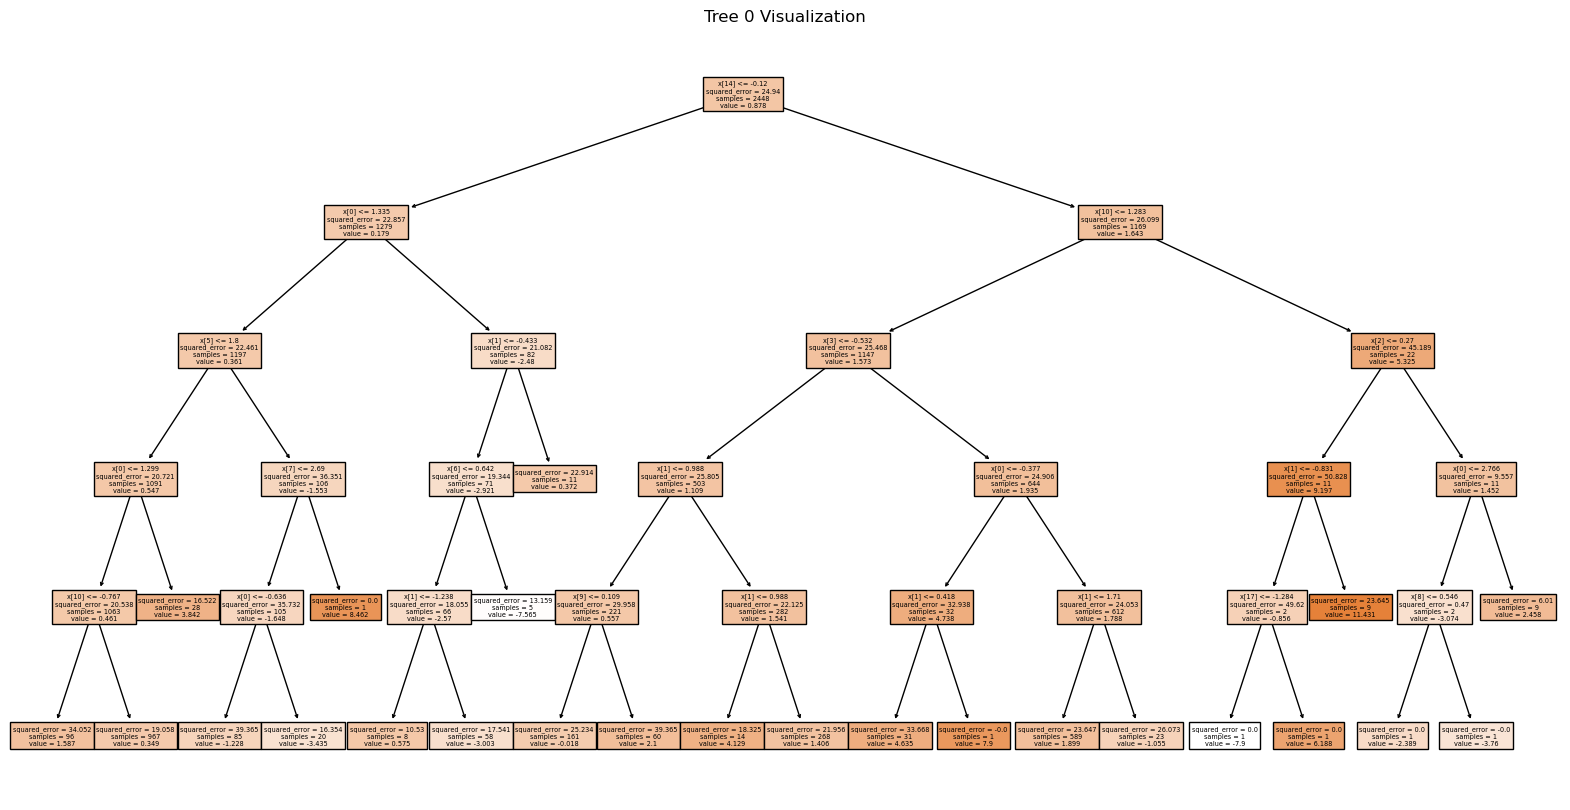

Tree 1 feature importances:
[0.24548614 0.22093708 0.         0.03590579 0.         0.07898194
 0.         0.0187652  0.         0.03634669 0.08114925 0.
 0.         0.         0.24254617 0.         0.         0.01838963
 0.         0.0214921 ]
Tree 1 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_7 <= 2.69
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_7 >  2.69
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_19 <= 1.4

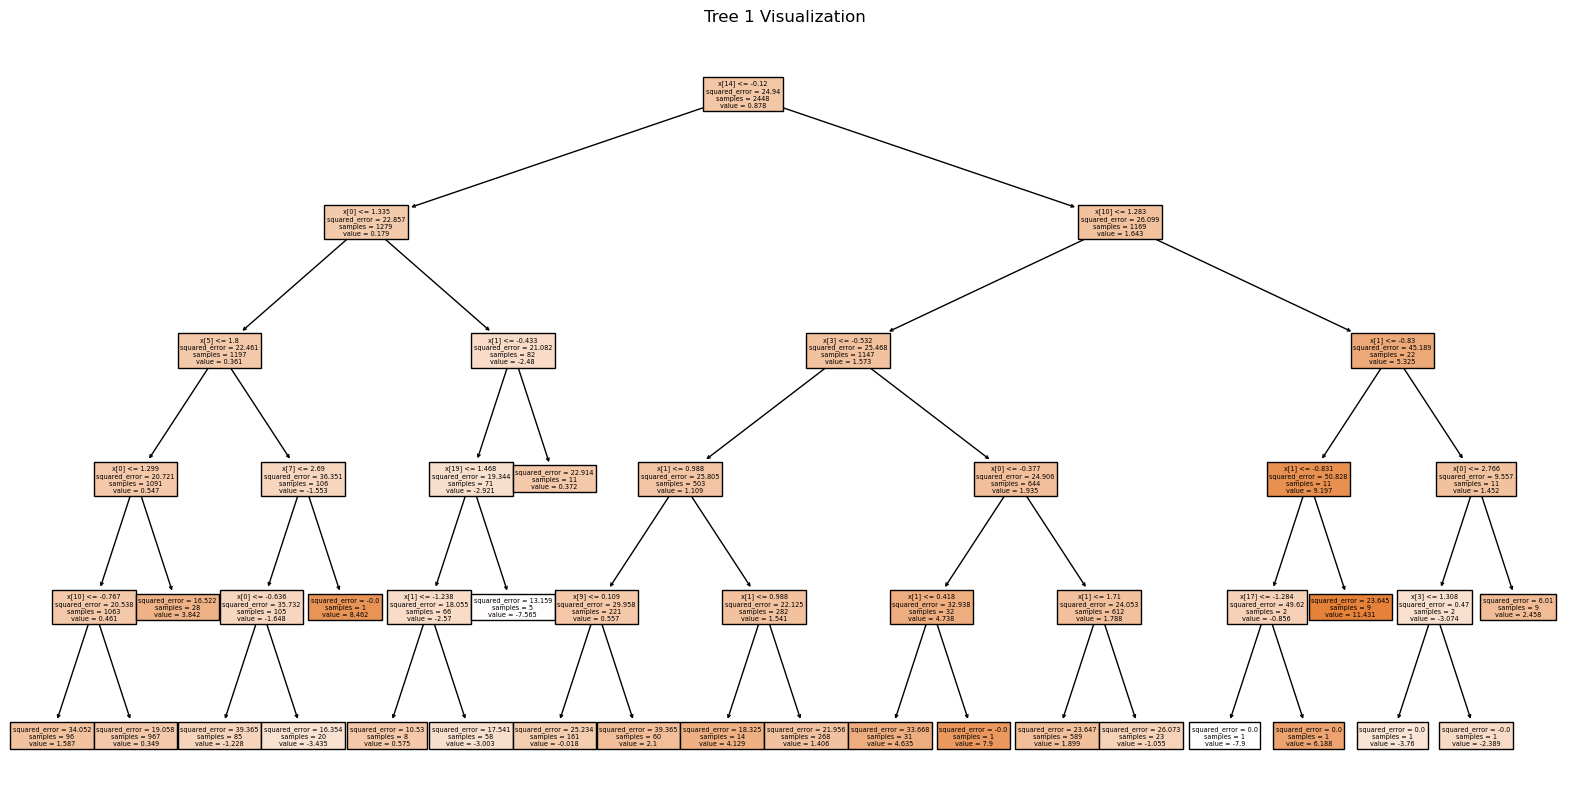

Tree 2 feature importances:
[0.29126733 0.11401947 0.         0.03573161 0.         0.07898194
 0.         0.         0.         0.09748311 0.09953888 0.
 0.         0.         0.24254617 0.0187652  0.         0.
 0.         0.02166628]
Tree 2 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_15 <= 0.59
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_15 >  0.59
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_19 <= 1.47
|   

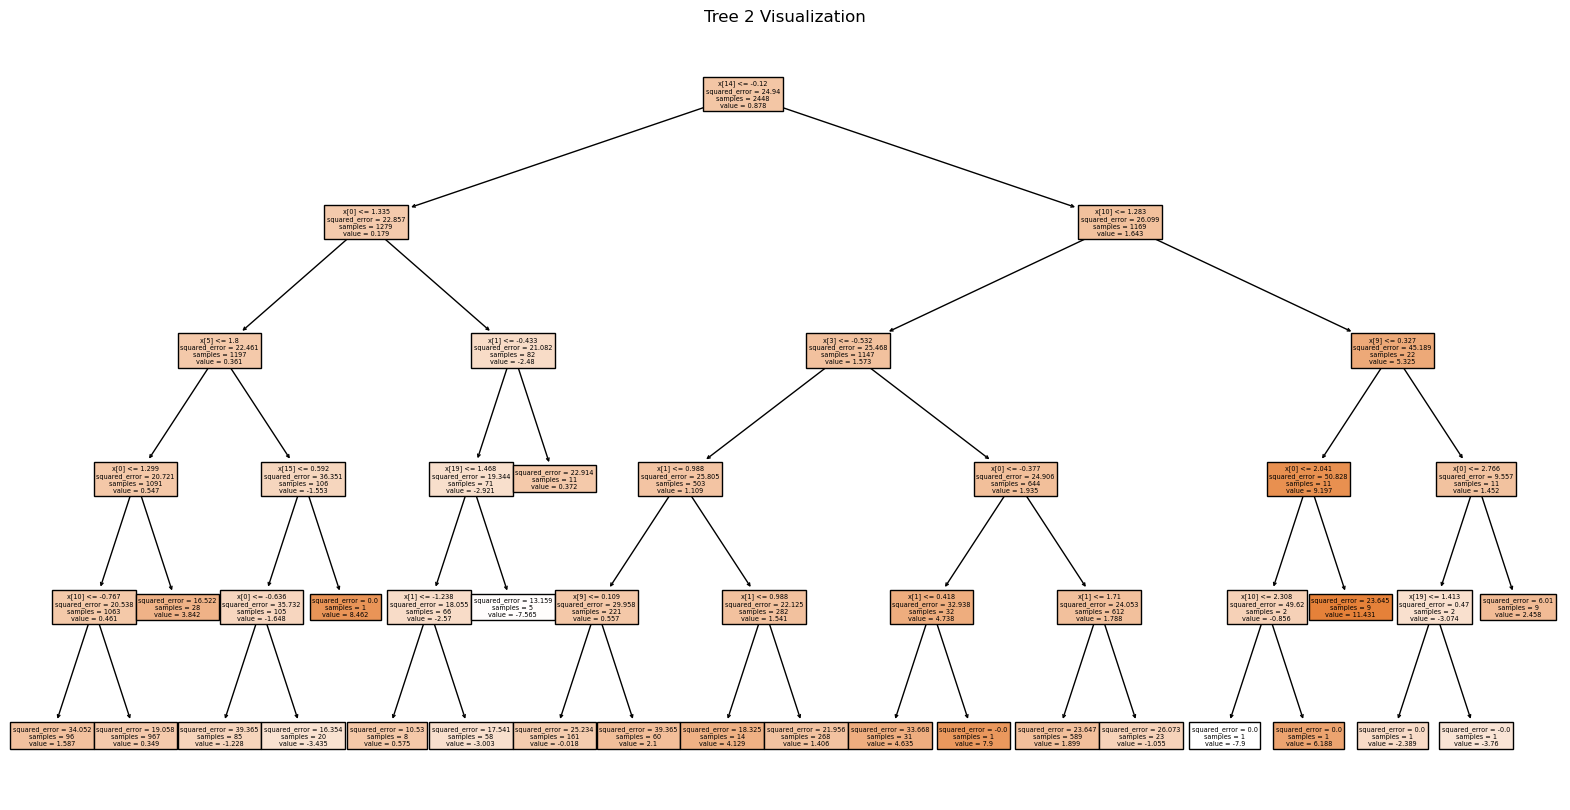

Tree 3 feature importances:
[0.29126733 0.11419365 0.         0.05449681 0.         0.07898194
 0.         0.         0.         0.05783879 0.08114925 0.
 0.         0.         0.24254617 0.         0.         0.01838963
 0.06113642 0.        ]
Tree 3 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_3 <= 0.23
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_3 >  0.23
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_9 <= 0.49

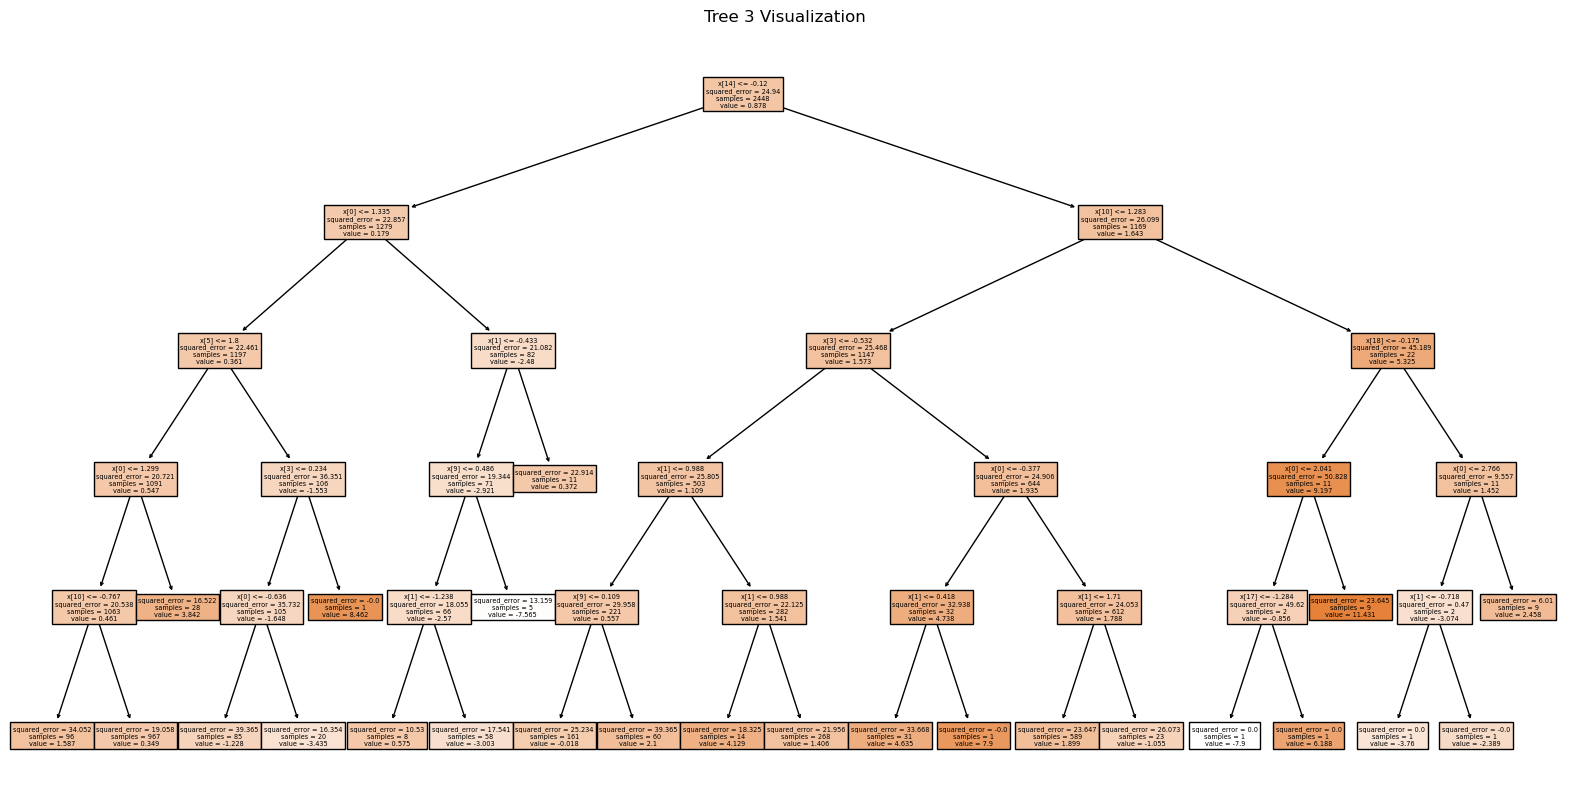

Tree 4 feature importances:
[0.24548614 0.15980066 0.         0.03573161 0.         0.07915612
 0.         0.         0.09748311 0.0214921  0.08114925 0.
 0.         0.         0.24254617 0.0187652  0.         0.
 0.01838963 0.        ]
Tree 4 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_15 <= 0.59
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_15 >  0.59
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_9 <= 0.49
|   |

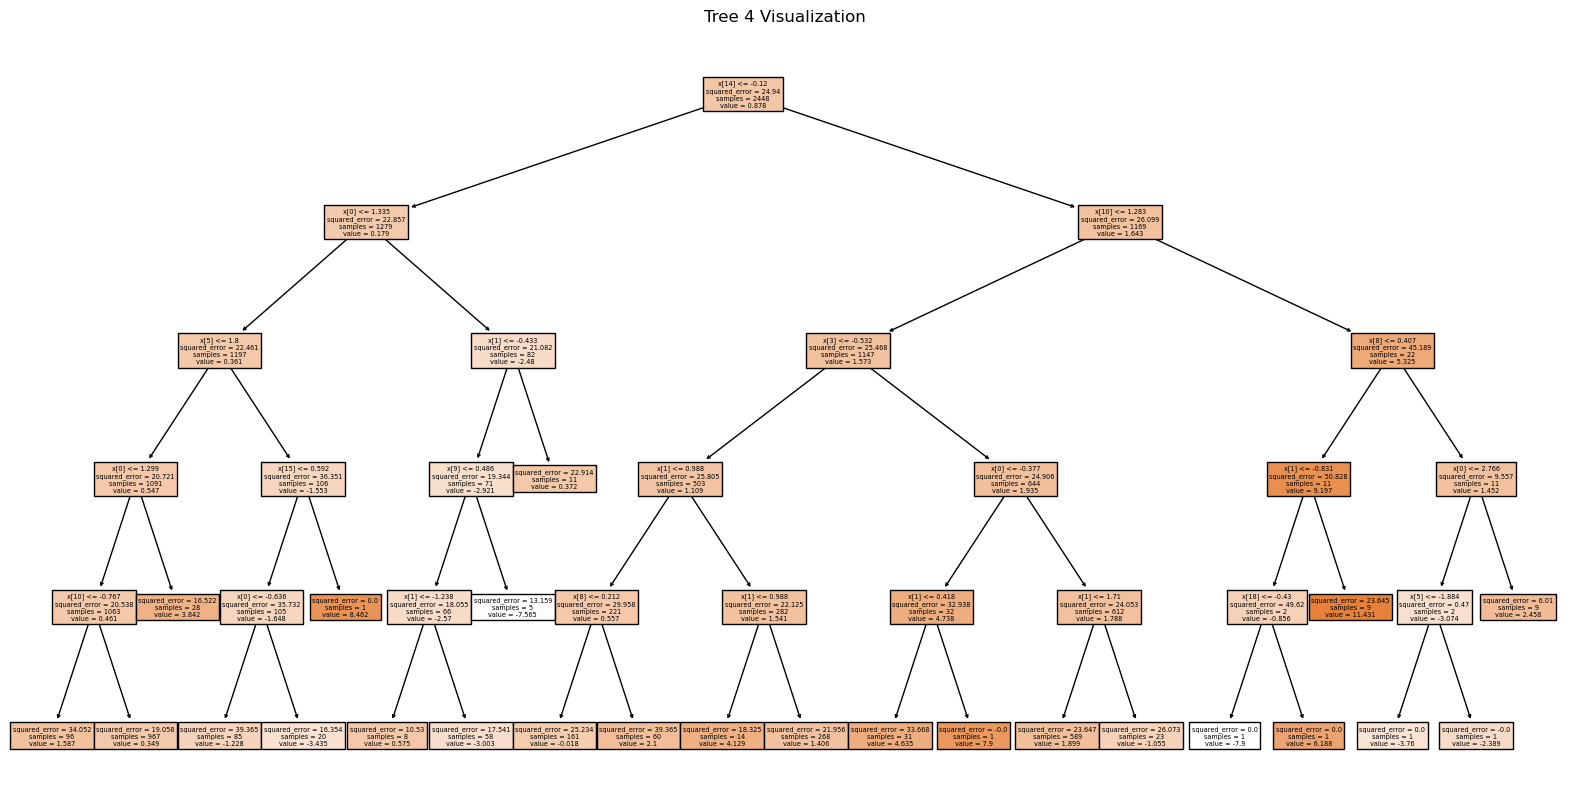

Tree 5 feature importances:
[2.45486141e-01 1.59800659e-01 0.00000000e+00 3.57316109e-02
 0.00000000e+00 7.89819399e-02 0.00000000e+00 0.00000000e+00
 3.63466901e-02 2.14920971e-02 8.11492512e-02 0.00000000e+00
 0.00000000e+00 1.83896308e-02 2.42546174e-01 1.87651990e-02
 0.00000000e+00 0.00000000e+00 6.11364244e-02 1.74182719e-04]
Tree 5 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_15 <= 0.59
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_15 >  0.59
|   |   |   |   |--- value: [8.46]
| 

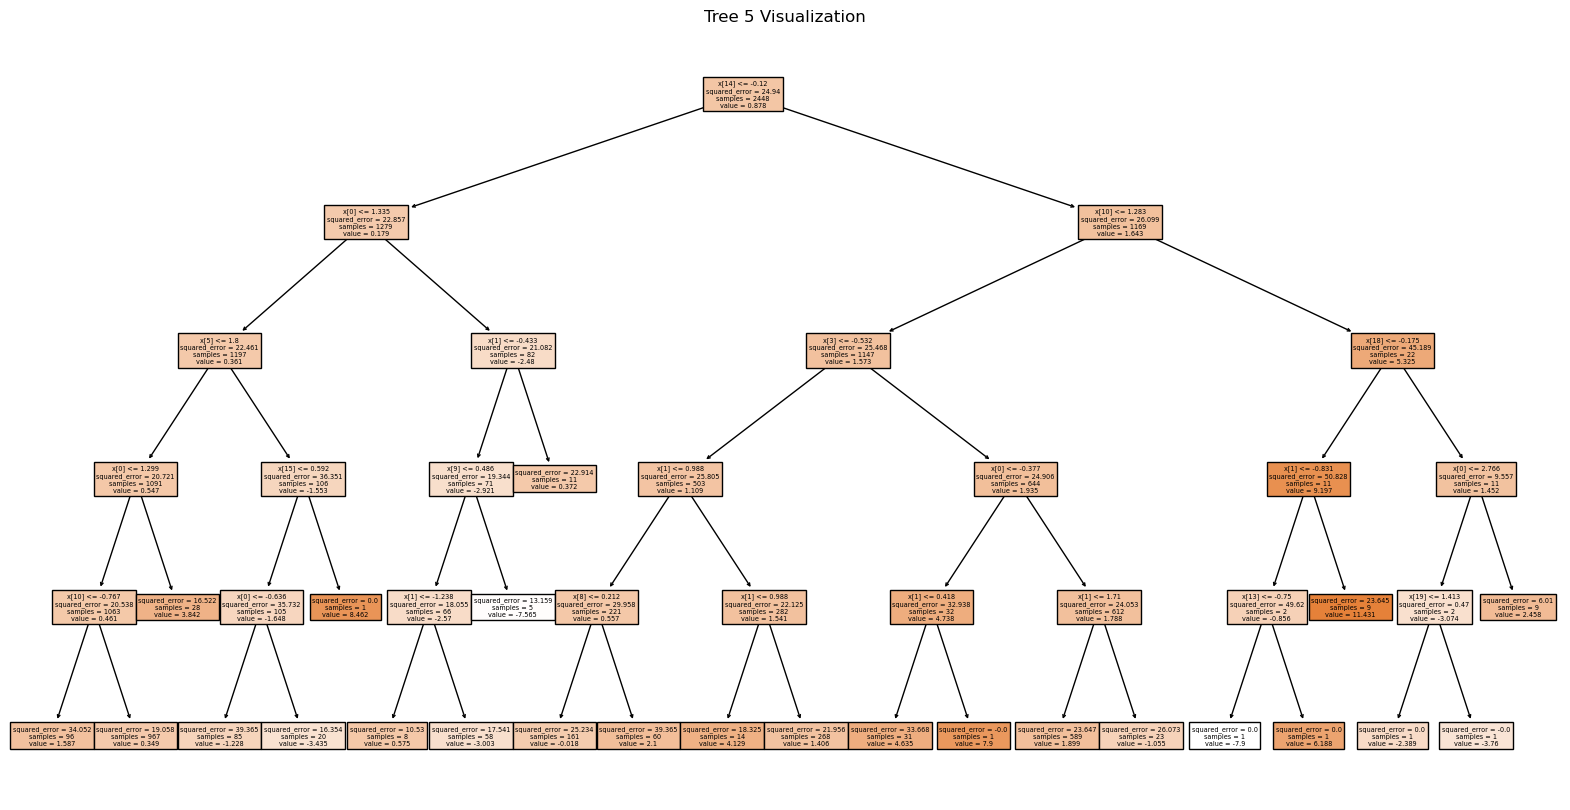

Tree 6 feature importances:
[0.29126733 0.11401947 0.06113642 0.05449681 0.         0.07915612
 0.         0.         0.01838963 0.03634669 0.08114925 0.
 0.         0.         0.24254617 0.         0.         0.
 0.0214921  0.        ]
Tree 6 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_3 <= 0.23
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_3 >  0.23
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_18 <= 0.21
|   | 

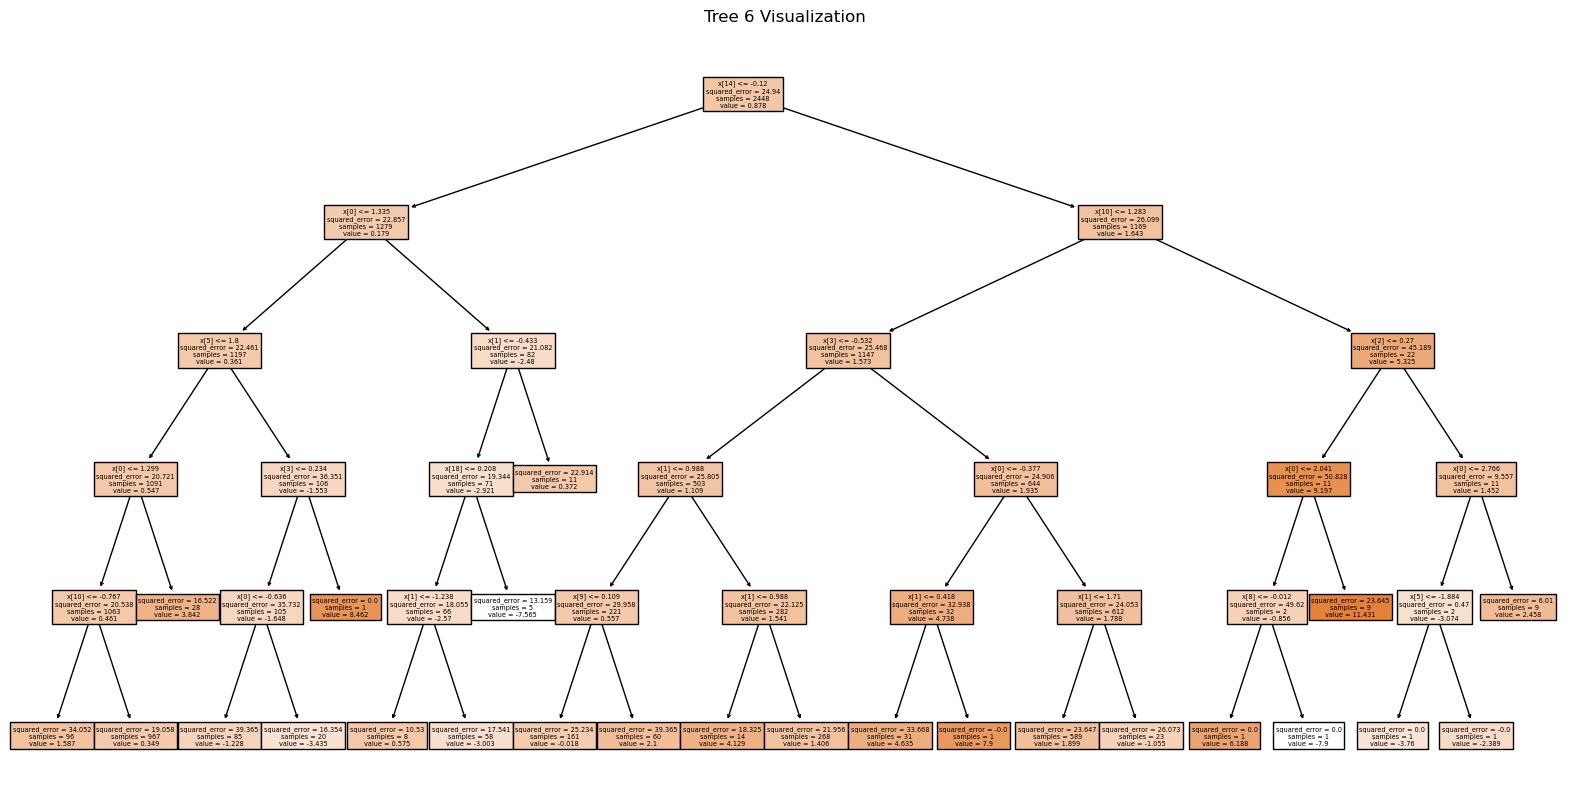

Tree 7 feature importances:
[0.24548614 0.18129276 0.         0.03590579 0.         0.07898194
 0.         0.0187652  0.03634669 0.06113642 0.08114925 0.
 0.         0.         0.24254617 0.         0.         0.
 0.01838963 0.        ]
Tree 7 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_7 <= 2.69
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_7 >  2.69
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_1 <= -0.51
|   | 

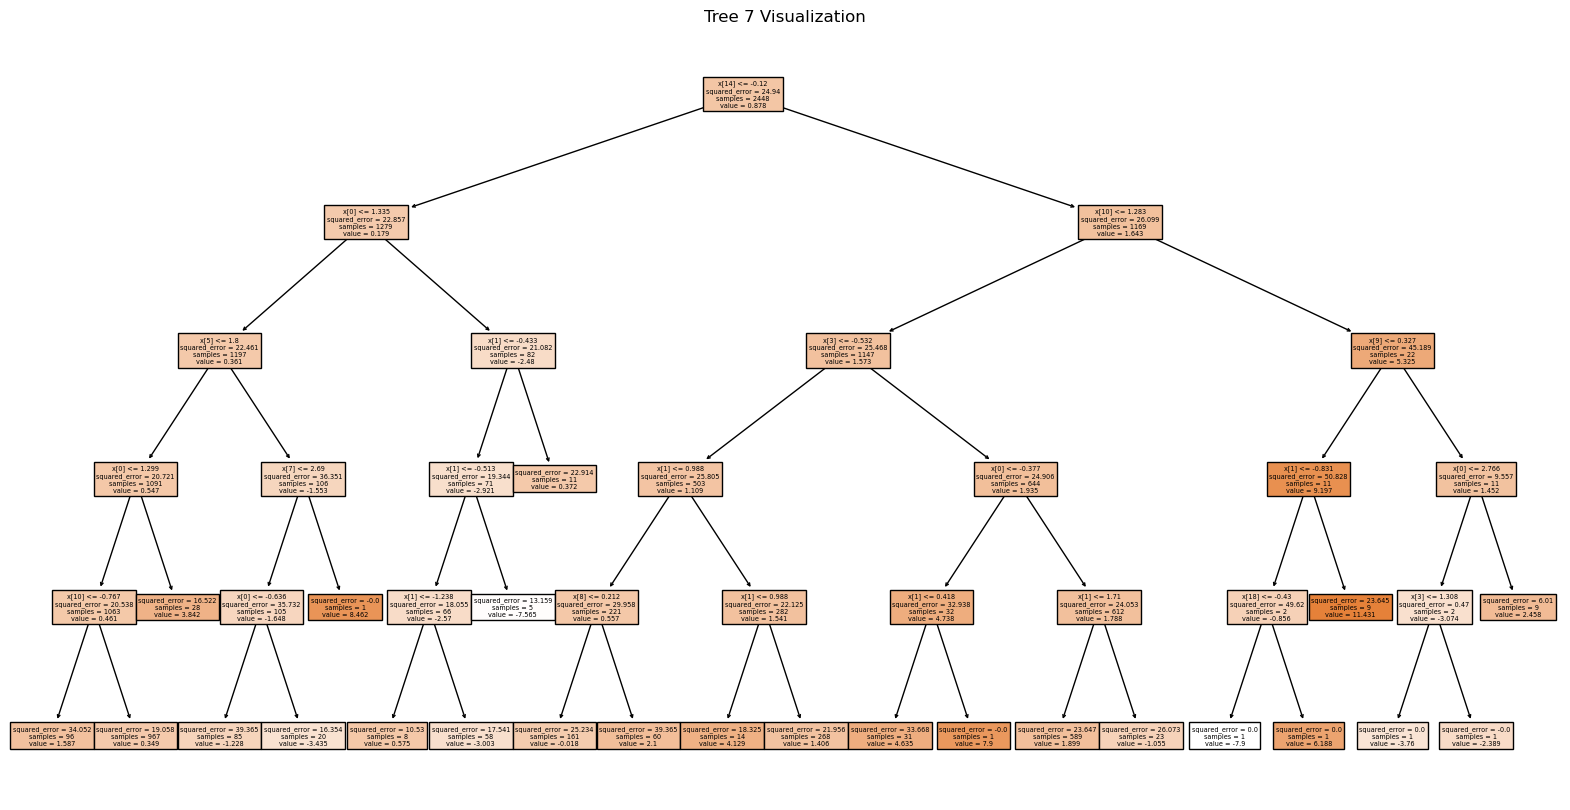

Tree 8 feature importances:
[0.29126733 0.11401947 0.         0.05449681 0.         0.07898194
 0.         0.         0.         0.09748311 0.08132343 0.
 0.         0.         0.2609358  0.         0.         0.
 0.         0.0214921 ]
Tree 8 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_3 <= 0.23
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_3 >  0.23
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_19 <= 1.47
|   | 

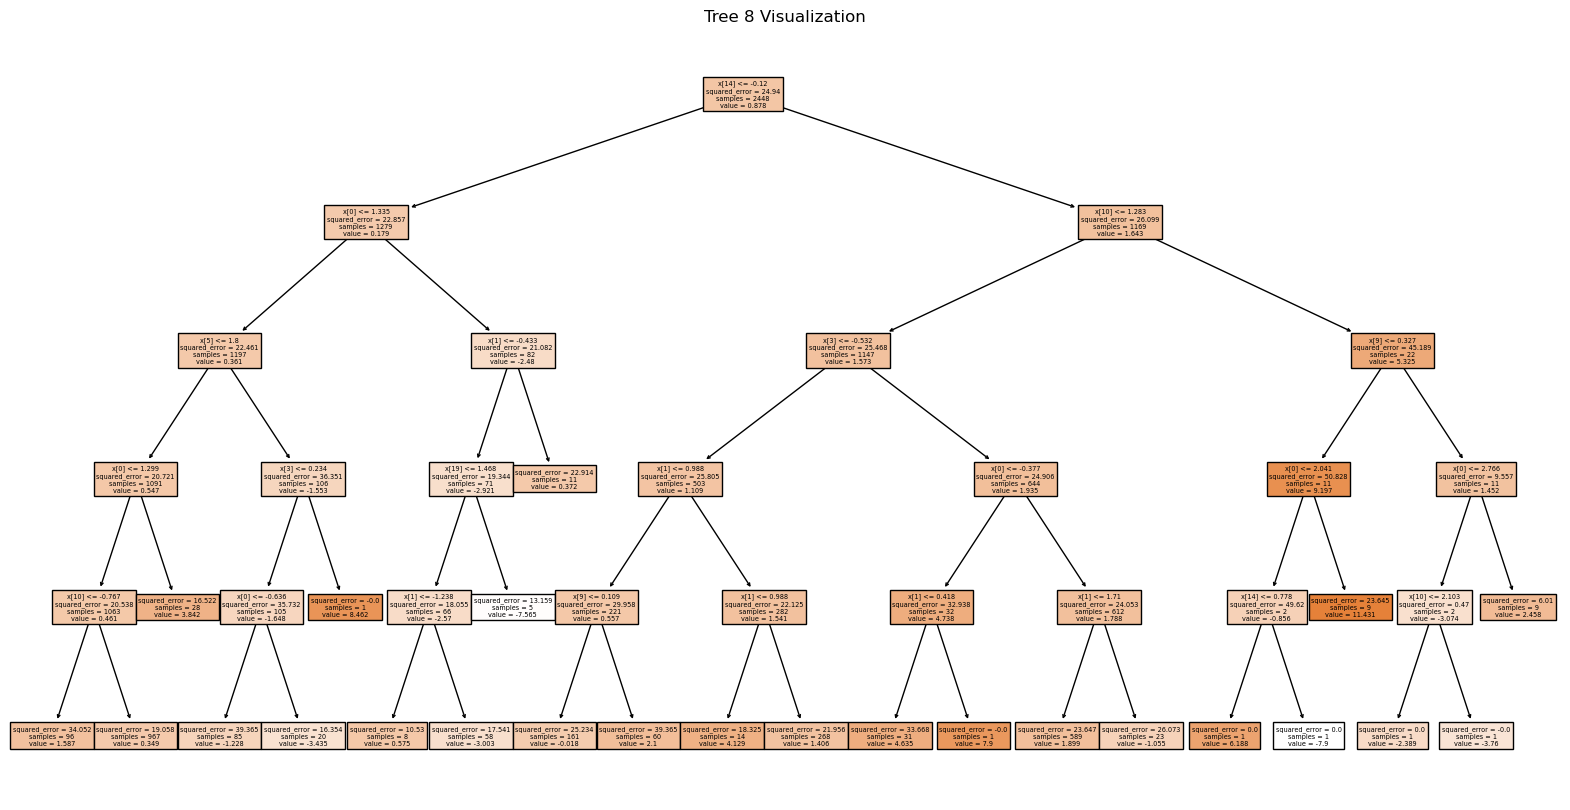

Tree 9 feature importances:
[0.24548614 0.22111127 0.         0.03573161 0.         0.07898194
 0.         0.0187652  0.03634669 0.         0.08114925 0.
 0.         0.         0.24254617 0.01838963 0.         0.
 0.0214921  0.        ]
Tree 9 structure:
|--- feature_14 <= -0.12
|   |--- feature_0 <= 1.34
|   |   |--- feature_5 <= 1.80
|   |   |   |--- feature_0 <= 1.30
|   |   |   |   |--- feature_10 <= -0.77
|   |   |   |   |   |--- value: [1.59]
|   |   |   |   |--- feature_10 >  -0.77
|   |   |   |   |   |--- value: [0.35]
|   |   |   |--- feature_0 >  1.30
|   |   |   |   |--- value: [3.84]
|   |   |--- feature_5 >  1.80
|   |   |   |--- feature_7 <= 2.69
|   |   |   |   |--- feature_0 <= -0.64
|   |   |   |   |   |--- value: [-1.23]
|   |   |   |   |--- feature_0 >  -0.64
|   |   |   |   |   |--- value: [-3.43]
|   |   |   |--- feature_7 >  2.69
|   |   |   |   |--- value: [8.46]
|   |--- feature_0 >  1.34
|   |   |--- feature_1 <= -0.43
|   |   |   |--- feature_18 <= 0.21
|   | 

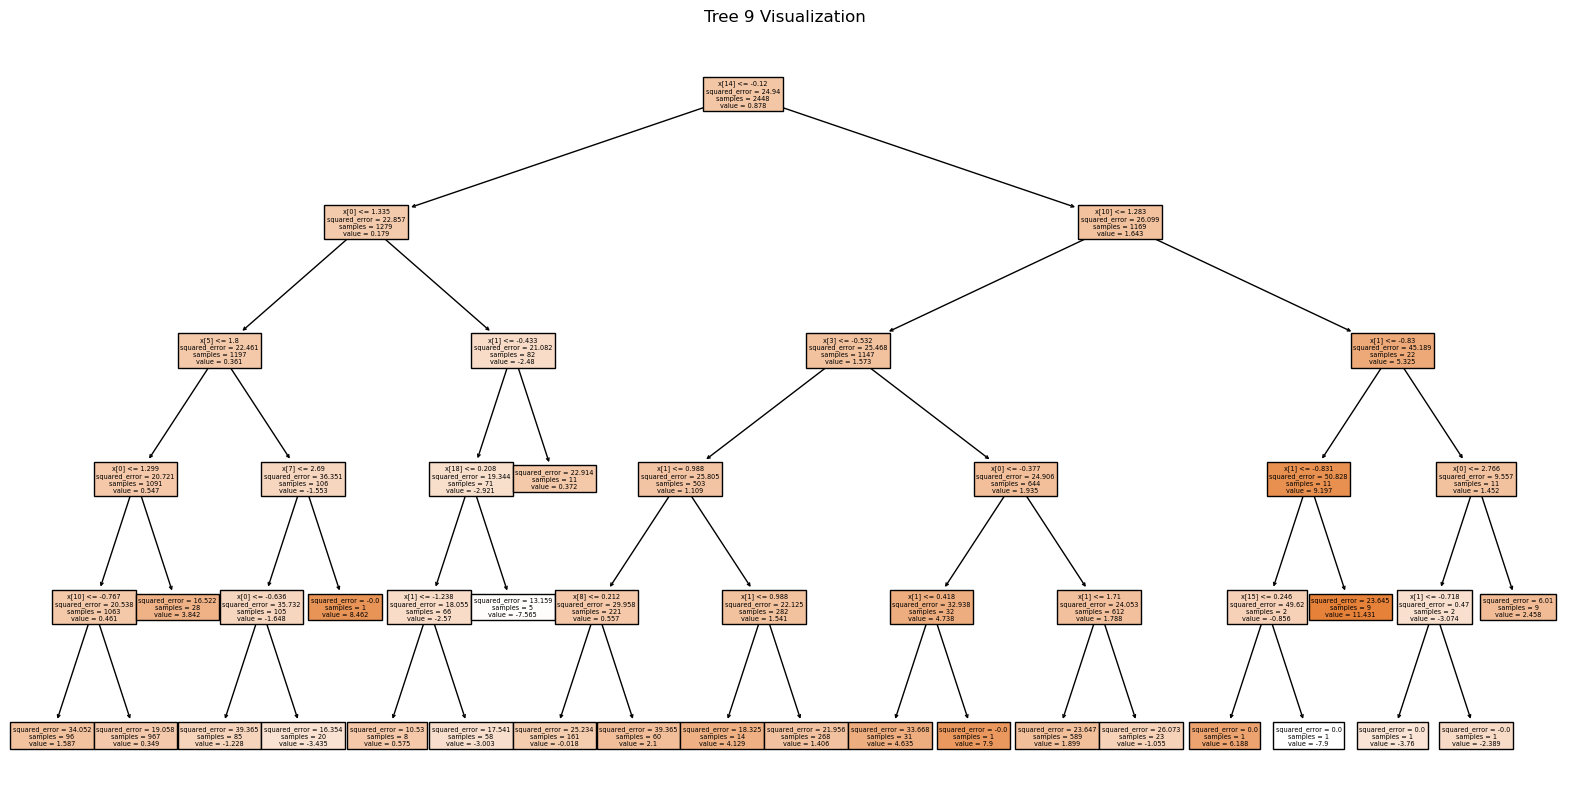

In [16]:
# Get and print tree importances
tree_importances = fonn2.get_tree_importances()